In [41]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import openslide
import numpy as np 
import os
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go

In [42]:
PATH = '/kaggle/input//prostate-cancer-grade-assessment'
train = f'{PATH}/train.csv'
test  = f'{PATH}/test.csv'

In [43]:
train_df = pd.read_csv(train).set_index('image_id')
test_df = pd.read_csv(test).set_index('image_id')
train_df.head()

,data_provider,isup_grade,gleason_score
image_id,,,
0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [44]:
print(f'training data len {train_df.shape}')
print(f'test data len {test_df.shape}')
print(f'unique data providers: {train_df.data_provider.unique()}')
print(f'unique isup grade: {train_df.isup_grade.unique()}')
print(f'unique gleason score: {train_df.gleason_score.unique()}')

training data len (10616, 3)
test data len (3, 1)
unique data providers: ['karolinska' 'radboud']
unique isup grade: [0 4 1 3 5 2]
unique gleason score: ['0+0' '4+4' '3+3' '4+3' 'negative' '4+5' '3+4' '5+4' '5+5' '5+3' '3+5']


In [45]:
columns = ['data_provider', 'isup_grade', 'gleason_score']
for cc in columns:
    fig = px.histogram(train_df, x=cc, title=f'{cc} Count' )
    fig.show() 

In [46]:
TRAINING_IMG = f'{PATH}/train_images'
MASK_IMG = f'{PATH}/train_label_masks'
imgs = os.listdir(TRAINING_IMG)
msks = os.listdir(MASK_IMG)

In [47]:
def display_batch(imgs):
    f, ax = plt.subplots(2,3, figsize=(18,22))
    for i, img in enumerate(imgs):
        
        
        data_provider = train_df.loc[img, 'data_provider']
        isup_grade = train_df.loc[img, 'isup_grade']
        gleason_score = train_df.loc[img, 'gleason_score']
        
        # read image
        image = openslide.OpenSlide(os.path.join(TRAINING_IMG, img + '.tiff'))
        spacing = 1 / (float(image.properties['tiff.XResolution']) / 10000)
        patch = image.read_region((1850,1950), 0, (256, 256))
        
        ## read mask img
        mask = openslide.OpenSlide(os.path.join(MASK_IMG, f'{img}_mask.tiff'))
        mask_data = mask.read_region((0,0), mask.level_count - 1, mask.level_dimensions[-1])
        cmap = ListedColormap(['black', 'gray', 'green', 'yellow', 'orange', 'red'])
        
        
        ax[0, i].imshow(patch)   
        ax[0, i].axis('off')
        ax[0, i].set_title(f"ID: {img}\nSource: {train_df.loc[img, 'gleason_score']} ISUP: {isup_grade} Gleason: {gleason_score}")
        
        ax[1, i].imshow(np.asarray(mask_data)[:,:,0], cmap=cmap, interpolation='nearest', vmin=0, vmax=5)      
        ax[1, i].axis('off')
        ax[1, i].set_title('mask')
        

    plt.show() 

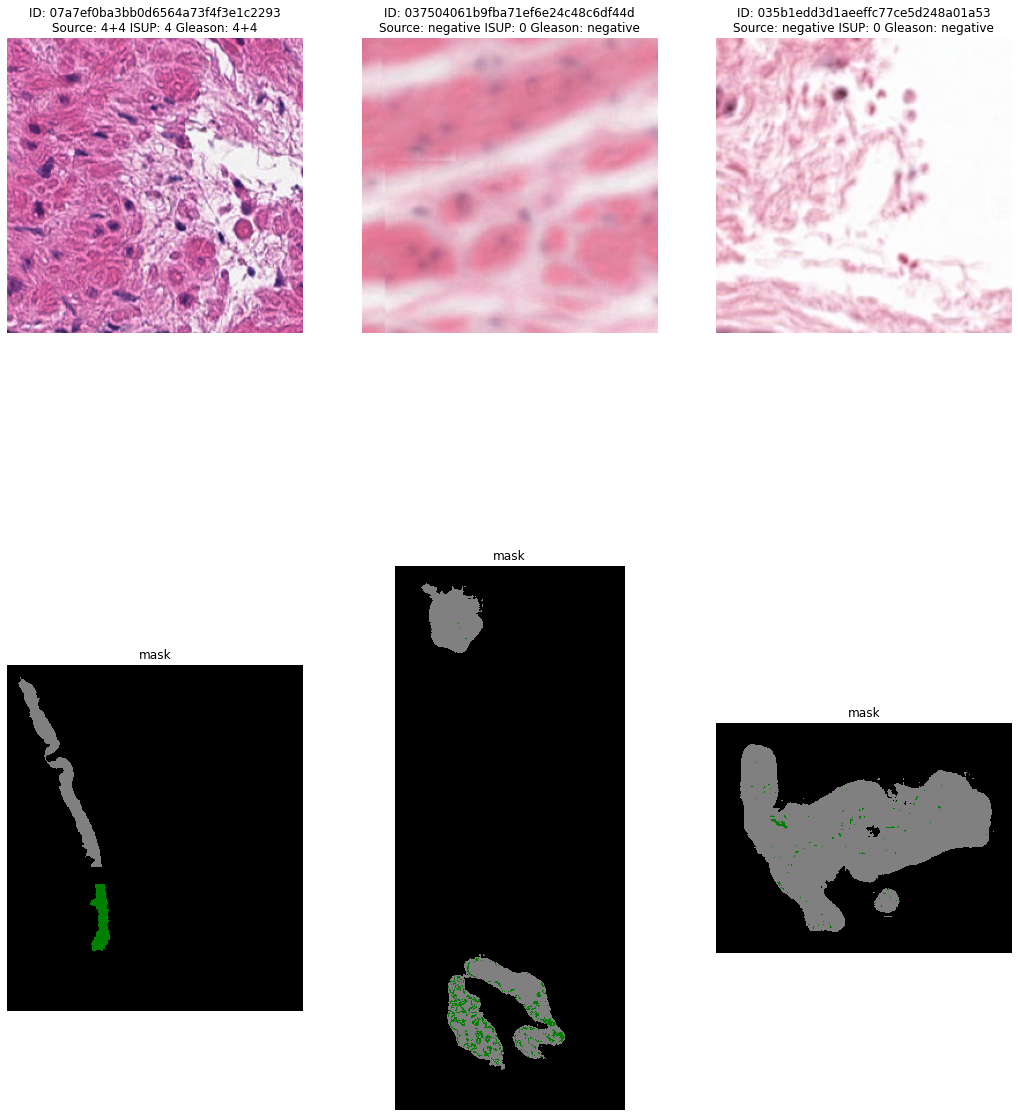

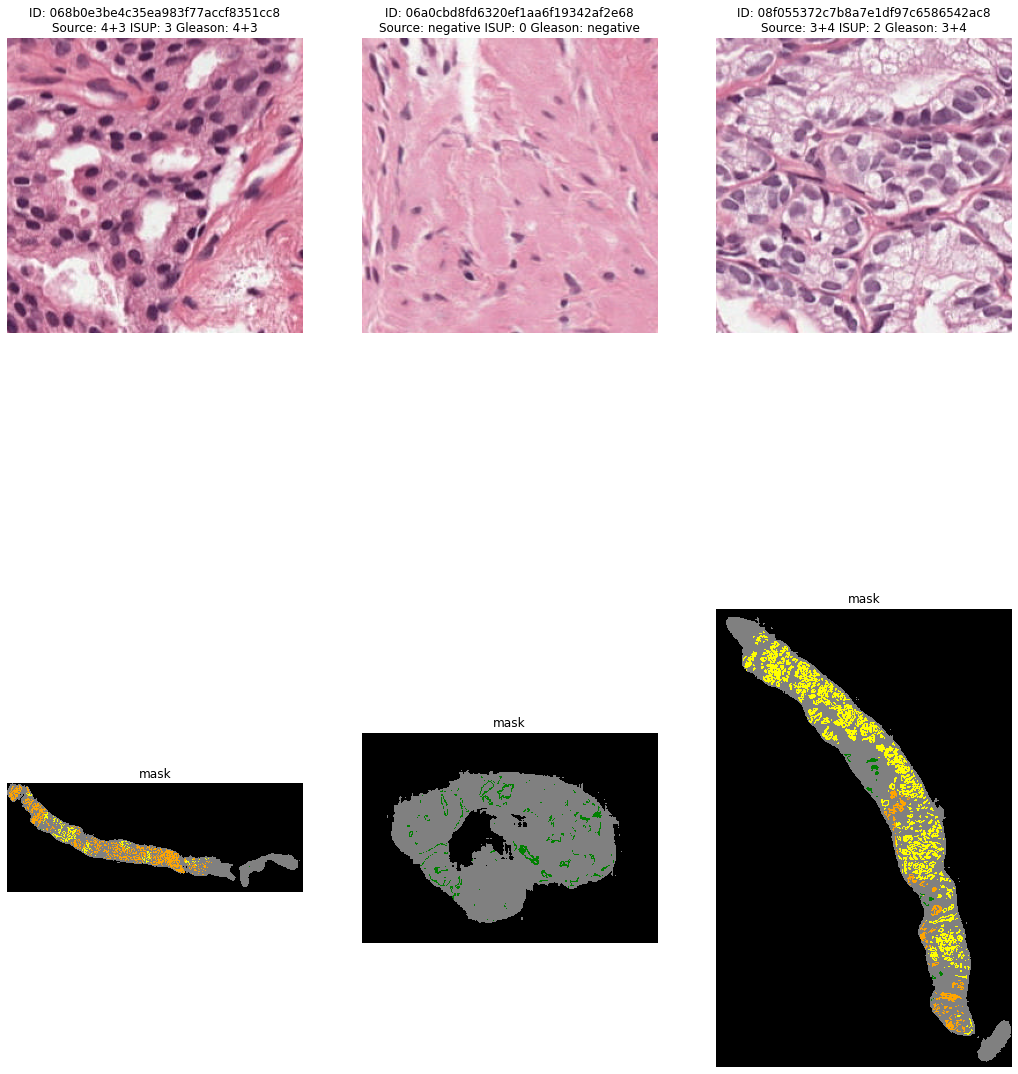

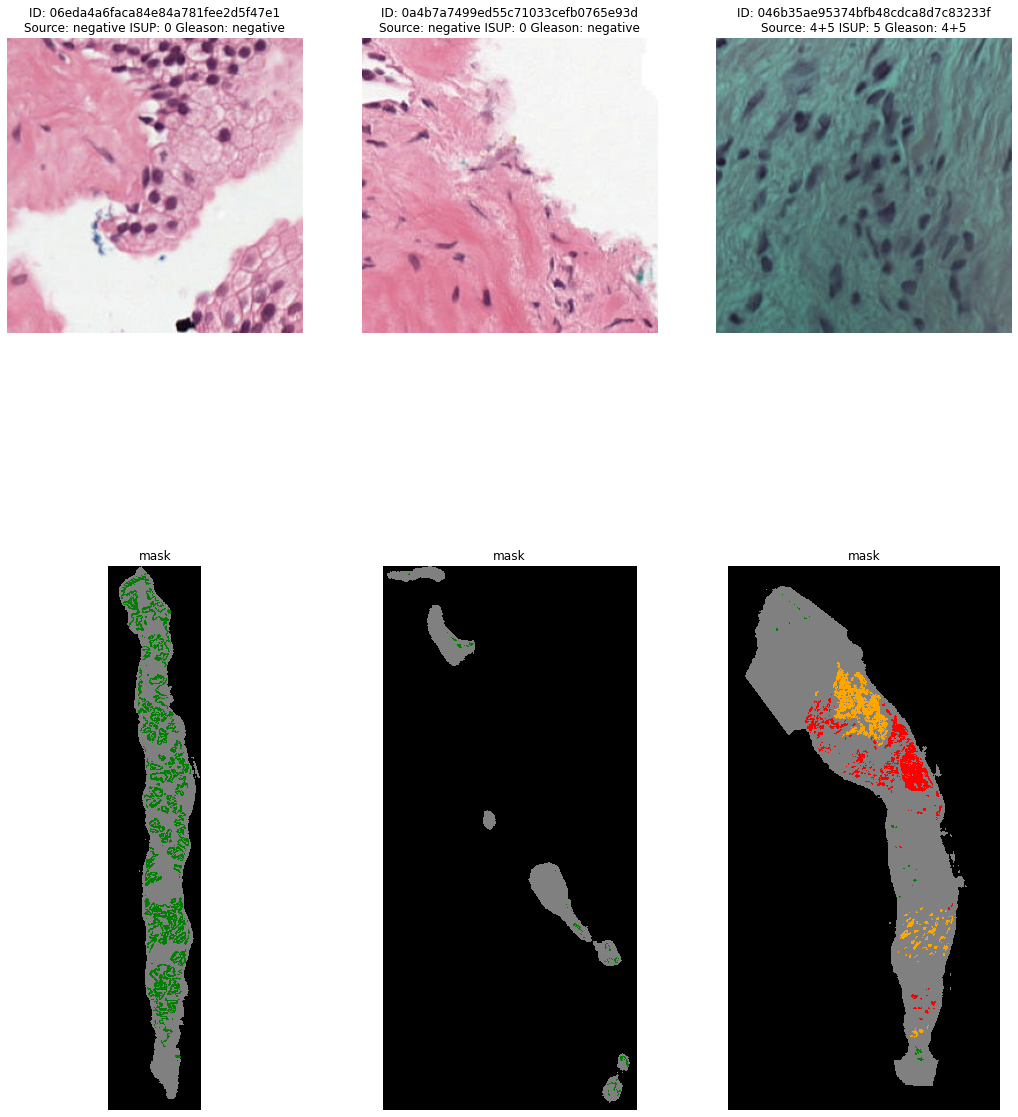

In [48]:
imgs = [
    '07a7ef0ba3bb0d6564a73f4f3e1c2293',
    '037504061b9fba71ef6e24c48c6df44d',
    '035b1edd3d1aeeffc77ce5d248a01a53',
    '068b0e3be4c35ea983f77accf8351cc8',
    '06a0cbd8fd6320ef1aa6f19342af2e68',
    '08f055372c7b8a7e1df97c6586542ac8',
    '06eda4a6faca84e84a781fee2d5f47e1',
    '0a4b7a7499ed55c71033cefb0765e93d',
    '046b35ae95374bfb48cdca8d7c83233f',
]

batches= [imgs[:3],
          imgs[3:6],
          imgs[6:9]
]
for batch in batches:
    display_batch(batch)